Binisha Shakya

**Problem 1 - Data Read, Write and Inspect:**

In [ ]:
import pandas as pd

1. Load the provided dataset and import in pandas DataFrame.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Concepts and Technology of AI/bank .csv")

In [ ]:
#2: Check info of the DataFrame
# (a) Identify columns with dtype=object
object_columns = df.select_dtypes(include=['object']).columns
print("Columns with dtype=object:")
print(object_columns)

# (b) Find unique values of those columns
print("\nUnique values of dtype=object columns:")
for col in object_columns:
    print(f"{col}: {df[col].unique()}")

# (c) Check for the total number of null values in each column
null_values = df.isnull().sum()
print("\nTotal number of null values in each column:")
print(null_values)




Columns with dtype=object:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

Unique values of dtype=object columns:
job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'failure' 'other' 'success']
y: ['no' 'yes']

Total number of null values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y      

In [ ]:
#3: Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
#”.csv” with name ”banknumericdata.csv”
df_numeric = df.drop(columns=object_columns)
df_numeric.to_csv("banknumericdata.csv", index=False)

In [ ]:
#4: Read the new ”banknumericdata.csv” and find summary statistics
df_numeric_reloaded = pd.read_csv("banknumericdata.csv")
summary_statistics = df_numeric_reloaded.describe()
print("\nSummary Statistics:")
print(summary_statistics)


Summary Statistics:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%   

#Problem 2 - Data Imputations:
Complete all the following Task:
• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify column with missing (null) values.
3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.
4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [ ]:
#1.importing the data from file
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/Concepts and Technology of AI/medical_students_dataset.csv");
#checking the info of the Dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [ ]:
#counting the number of null values in each column
missing_values=dataset.isnull().sum()
print("Columns with missing values=\n",missing_values)

Columns with missing values=
 Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64


dataset.fillna(0)->This method is easy to implement and could be applied to numerical columns.

In [ ]:
#missing null values with zero
dataset_zeros=dataset.fillna(0)
print("Filling null values with zero=\n ",dataset_zeros)

Filling null values with zero=
          Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0              1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1              2.0   0.0    Male  152.069157  47.630941          B   0.000000   
2              3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3              0.0  30.0    Male  182.112867  63.332207          B  19.096042   
4              5.0  23.0  Female    0.000000  46.234173          O   0.000000   
...            ...   ...     ...         ...        ...        ...        ...   
199995         0.0  24.0    Male  176.503260  95.756997          B  30.737254   
199996     99997.0  29.0  Female  163.917675  45.225194          0  16.831734   
199997     99998.0  34.0  Female    0.000000  99.648914          0  33.189303   
199998     99999.0  30.0  Female  156.446944  50.142824          A  20.486823   
199999    100000.0  20.0  Female  153.927409  99.928405          O  42.17518

dataset.ffill()-> It is used to filling the missing value of a column by coping the value of the previous non-missing observation so we can logically fill the missing values with the last values

In [ ]:
#filling missing/null values using forward fill
dataset_forward_fill=dataset.ffill()
print("Filling null values with forward fill= \n",dataset_forward_fill)

Filling null values with forward fill= 
         Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0              1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1              2.0  18.0    Male  152.069157  47.630941          B  27.645835   
2              3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3              3.0  30.0    Male  182.112867  63.332207          B  19.096042   
4              5.0  23.0  Female  182.112867  46.234173          O  19.096042   
...            ...   ...     ...         ...        ...        ...        ...   
199995     99995.0  24.0    Male  176.503260  95.756997          B  30.737254   
199996     99997.0  29.0  Female  163.917675  45.225194          B  16.831734   
199997     99998.0  34.0  Female  163.917675  99.648914          B  33.189303   
199998     99999.0  30.0  Female  156.446944  50.142824          A  20.486823   
199999    100000.0  20.0  Female  153.927409  99.928405          O  

dataset['column_name'].fillna(dataset['column_name'].mean())->Using this method, we can replace missing values with the central tendency in the numerical columns.

In [ ]:
#filling missing/null values of age with the mean of the column
dataset_mean= dataset['Age'].fillna(dataset['Age'].mean())
print("Filling null values with mean=\n",dataset_mean)

Filling null values with mean=
 0         18.000000
1         26.021561
2         32.000000
3         30.000000
4         23.000000
            ...    
199995    24.000000
199996    29.000000
199997    34.000000
199998    30.000000
199999    20.000000
Name: Age, Length: 200000, dtype: float64


dataset['column_name'].fillna(dataset['column_name'].median())->Using this method, we can replace missing values with the median value in the numerical columns. It is a good way to fill missing values when the dataset might contain outliers.

In [ ]:
#filling missing/null values of Age with median of the column
dataset_median=dataset['Age'].fillna(dataset['Age'].median())
print("Filling null values with median=\n",dataset_median)

Filling null values with median=
 0         18.0
1         26.0
2         32.0
3         30.0
4         23.0
          ... 
199995    24.0
199996    29.0
199997    34.0
199998    30.0
199999    20.0
Name: Age, Length: 200000, dtype: float64


dataset['column_name'].fillna(dataset['column_name'].mode())->Using this method, we can replace missing values with the most occured value in the numerical columns.

In [ ]:
#filling missing/null values of Age with mode of the column
dataset_mode=dataset['Age'].fillna(dataset['Age'].mode())
print("Filling null values with mode=\n",dataset_mode)

Filling null values with mode=
 0         18.0
1          NaN
2         32.0
3         30.0
4         23.0
          ... 
199995    24.0
199996    29.0
199997    34.0
199998    30.0
199999    20.0
Name: Age, Length: 200000, dtype: float64


In [ ]:
#4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
#checking for duplicate rows
duplicate_count=dataset.duplicated().sum()
print("Number of duplicate rows= \n",duplicate_count)

Number of duplicate rows= 
 7644


In [ ]:
#displaying the duplicated rows
duplicates=dataset[dataset.duplicated()]
print("Duplicate rows=\n",duplicates)

Duplicate rows=
         Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
100007         8.0  28.0    Male  186.489402  52.389752         AB  15.063921   
100011        12.0  34.0  Female  182.416302  76.371050         AB  22.950992   
100018        19.0  31.0  Female  158.790160  46.829849         AB  18.572723   
100022        23.0  29.0  Female  179.909041  90.679436         AB  28.015787   
100023        24.0  18.0    Male         NaN  52.521560         AB  13.570402   
...            ...   ...     ...         ...        ...        ...        ...   
199961     99962.0  31.0    Male  180.859321  43.647709          B  13.343804   
199962     99963.0  18.0  Female  180.133710  48.381499          A  14.910401   
199965     99966.0  22.0  Female  166.562901  48.684146         AB  17.548137   
199973     99974.0  25.0  Female  156.297842  90.690186          B  37.123963   
199985     99986.0  23.0  Female  162.884951  82.485778          B  31.089745   

        Te

In [ ]:
#Removing duplicate rows
dataset_without_duplicates=dataset.drop_duplicates()
print("Dataset after removing duplicates= \n",dataset_without_duplicates)

Dataset after removing duplicates= 
         Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0              1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1              2.0   NaN    Male  152.069157  47.630941          B        NaN   
2              3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3              NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4              5.0  23.0  Female         NaN  46.234173          O        NaN   
...            ...   ...     ...         ...        ...        ...        ...   
199995         NaN  24.0    Male  176.503260  95.756997          B  30.737254   
199996     99997.0  29.0  Female  163.917675  45.225194        NaN  16.831734   
199997     99998.0  34.0  Female         NaN  99.648914        NaN  33.189303   
199998     99999.0  30.0  Female  156.446944  50.142824          A  20.486823   
199999    100000.0  20.0  Female  153.927409  99.928405          O  42.1

3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
Dataset Used: "titanic.csv"

#Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [ ]:
#Creating a dataframe
df=pd.DataFrame({
    'Name': ['Alice','Bob','Charlie','Daisy','Chris'],
    'Pclass':[1,2,1,2,3],
    'Age':[18,20,None,22,21],
    'Fare':[400,200,400,200,100],
    'Survived':[1,0,1,1,1]
})
#checking the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5 non-null      object 
 1   Pclass    5 non-null      int64  
 2   Age       4 non-null      float64
 3   Fare      5 non-null      int64  
 4   Survived  5 non-null      int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 328.0+ bytes


In [ ]:
#returns only those rows where Pclass is equal to 1
first_class=df[df['Pclass']==1]
print("Rows where Pclass is 1 = \n",first_class)

Rows where Pclass is 1 = 
       Name  Pclass   Age  Fare  Survived
0    Alice       1  18.0   400         1
2  Charlie       1   NaN   400         1


In [ ]:
#Calculating mean
fare_mean=df.Fare.mean()
print("Mean of the fare column= ",fare_mean)

Mean of the fare column=  260.0


In [ ]:
#Calculating median
fare_median=df.Fare.median()
print("Median of the fare column= ",fare_median)

Median of the fare column=  200.0


In [ ]:
#Calculating Maximum value
fare_max=df.Fare.max()
print("Maximum value of the fare column= ",fare_max)

Maximum value of the fare column=  400


In [ ]:
#Calculating minimum value
fare_min=df.Fare.min()
print("Minimum value of the fare column= ",fare_min)

Minimum value of the fare column=  100


Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [ ]:
#calculating the null values present in Age
null_values=df['Age'].isnull().sum()
print("Number of null values in Age column= ",null_values)

Number of null values in Age column=  1


In [ ]:
#dropping those rows which contain null values in Age column
df=df.dropna(subset=['Age']) #subset=['Age'] this part shows that the operation should be focused in Age column
print("Dataframe without null values=\n",df)

Dataframe without null values=
     Name  Pclass   Age  Fare  Survived
0  Alice       1  18.0   400         1
1    Bob       2  20.0   200         0
3  Daisy       2  22.0   200         1
4  Chris       3  21.0   100         1


Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:

• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton
Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Concepts and Technology of AI/Titanic-Dataset.csv")
#1.Using one hot encoding to convert the 'Embarkeed' column into separate binary columns
one_hot_encoding=pd.get_dummies(df['Embarked'],prefix="Embarked") #converts the Embarked column into binary columns prefixed with Embarked_

In [ ]:
#2.Concatenates the new columns to the original DataFrame along the columns axis.
df_encoded=pd.concat([df,one_hot_encoding],axis=1)
print("Using one hot encoding:\n",df_encoded)

Using one hot encoding:
      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                          

In [ ]:
#3.Dropping the original Embarked column
df_without_embarked=df.drop(columns=['Embarked'])
#printing the first five rows of the modified dataframe
print("First five rows of dataframe without Embarked column=\n",df_without_embarked.head(5))

First five rows of dataframe without Embarked column=
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  
0      0         A/5 21171   7.2500   NaN  
1      0          PC 17599  71.2833   C85  
2      0  STON/O2. 3101282   7.9250   NaN  
3      0            113803  53.1000  C123  
4      0            373450   8.0500   NaN  


Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Calculate the mean survival rates by gender
mean_survival=df.groupby('Sex')['Survived'].mean()
print(mean_survival)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<ipython-input-30-38cbcb74be1a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_survival.index, y=mean_survival.values, palette='pastel') #a bar plot showing the average survival rate for males and females


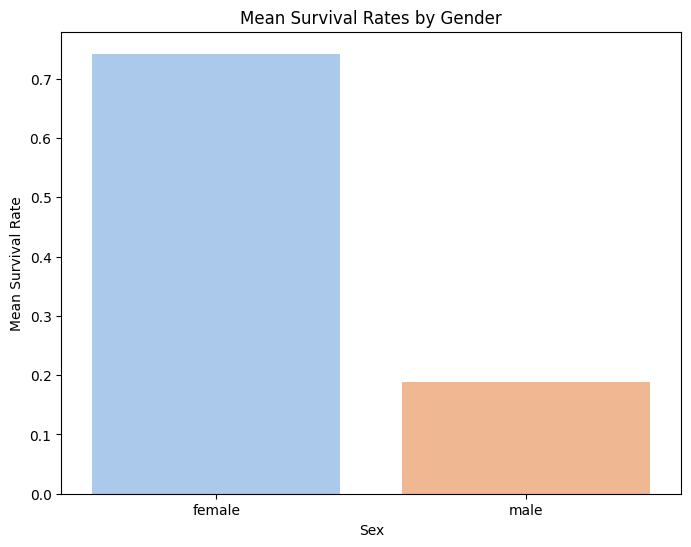

In [ ]:
#Visualization: Mean survival rates by gender
plt.figure(figsize=(8,6))
sns.barplot(x=mean_survival.index, y=mean_survival.values, palette='pastel') #a bar plot showing the average survival rate for males and females
plt.xlabel('Sex')
plt.ylabel('Mean Survival Rate')
plt.title('Mean Survival Rates by Gender')
plt.show()

<ipython-input-31-40abe57ff63b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sex', y='Survived', data=df, palette='pastel') #A violin plot showing the distribution of survival (0 or 1) for males and females.


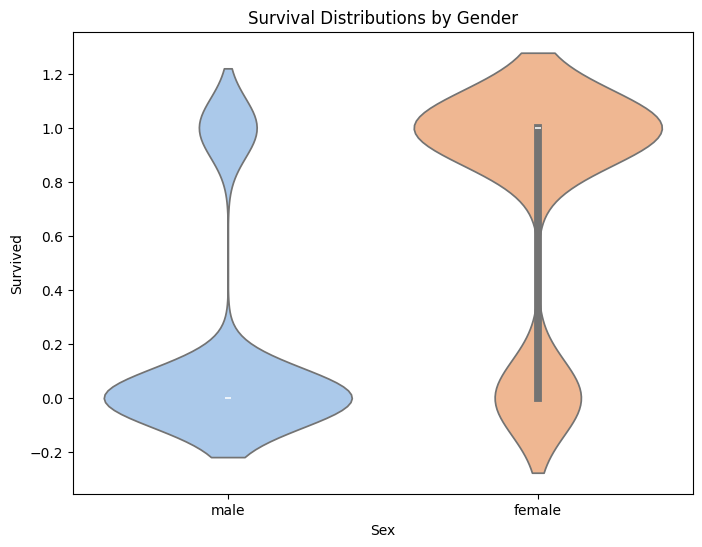

In [ ]:
#Visualization: Suvival distributions by gender
plt.figure(figsize=(8,6))
sns.violinplot(x='Sex', y='Survived', data=df, palette='pastel') #A violin plot showing the distribution of survival (0 or 1) for males and females.
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.title('Survival Distributions by Gender')
plt.show()

Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

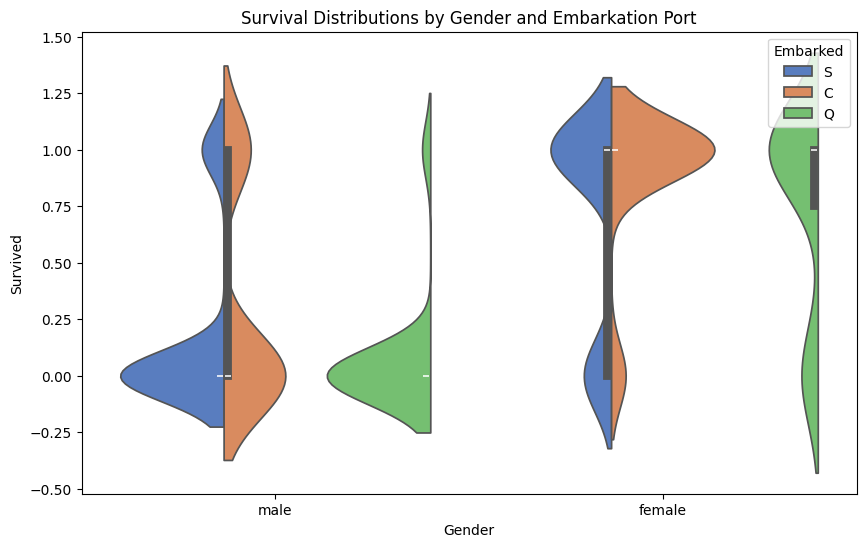

In [ ]:
# Visualization: Violin plot by gender and port of embarkation
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sex', y='Survived', hue='Embarked', data=df, split=True, palette='muted')
plt.title('Survival Distributions by Gender and Embarkation Port')
plt.ylabel('Survived')
plt.xlabel('Gender')
plt.legend(title='Embarked')
plt.show()